# HTTP Protocol

## HTTP request and response messages
HTTP protocol은 HTTP client(예: browser가 내장, curl, wget 등)와 HTTP server(web server가 내장)간의 통신 프로토콜이다. 
- Connection open: client 측
- request message: client 측. Connected socket으로) request message를 보내고, response message를 기다린다.
- response message: server는 request에 따라 처리하고, 통상, 파일에서 읽거나 application server로 부터 회신한 content(예: html 문서, 이미지, JSON)를  response message 속에 담아 회신한다.
- connection close: server 측
  - 일정시간까지 server는 connection을 유지한다.  Keep-alive timeout이 지나면 socket을 close한다. 
  - 회신 후 바로 close할 것을 client가 요구할 수 있다. (Request header에 `Connection: close` 삽입시. HTTP/1.1 기준)

> Stop-and-wait 방식으로 request - response 를 반복할 수도 있고<br>
> Pipelining 방식으로 보내는 stream(request1 - request2 - ...)과 받는 stream( response1 - response2 - ...)을 독립적으로 병행하여 진행할 수 있도록 HTTP가 정의되어 있다.

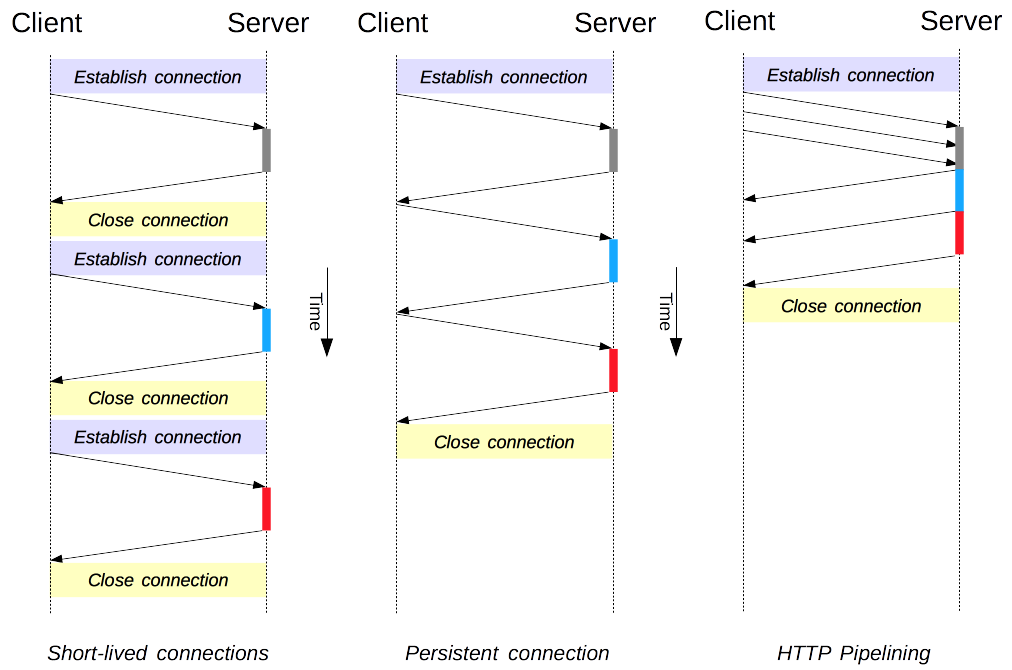

HTTP/1.1에서 다음 method가 정의되어 있다: `GET | POST | PUT | DELETE | HEAD` 

HTTP/1.1 request message syntax:
```
<method> <path> HTTP/1.1
<header-1>
<header-2>
...

[<body>]
```

HTTP/1.1 response message syntax:
```
HTTP/1.1 <status code> <status phrase>
<header-1>
<header-2>

<body>
```

주의: 각 line은 CRLF(`b'\r\n'`)로 끝난다. (인터넷 표준)

> See https://developer.mozilla.org/ko/docs/Web/HTTP/Messages

### Lab
Bash 창을 열고 다음 명령을 내리자. (Git bash App 등 설치된 bash를 이용한다.)
```bash
$ curl --verbose http://www.google.com
* Rebuilt URL to: http://www.google.com/
*   Trying 172.217.161.36...
* Connected to www.google.com (172.217.161.36) port 80 (#0)
> GET / HTTP/1.1
> Host: www.google.com
> User-Agent: curl/7.47.0
> Accept: */*
>
< HTTP/1.1 200 OK
< Date: Sat, 18 May 2019 05:25:28 GMT
< Expires: -1
< Cache-Control: private, max-age=0
< Content-Type: text/html; charset=ISO-8859-1
< P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
< Server: gws
< X-XSS-Protection: 0
< X-Frame-Options: SAMEORIGIN
< Set-Cookie: 1P_JAR=2019-05-18-05; expires=Mon, 17-Jun-2019 05:25:28 GMT; path=/; domain=.google.com
< Set-Cookie: NID=183=uXd-QOiYbP8F2oq4KASLVN41HQJJqOx91sWqjtcp_23E-UkhwJh51kV1ycDAGgPg7_kOLoYK8Dby9PACIfRmbhNFXuYy5WZGJjQHbFoZpqhrBjRtw_
JHW5v4WvQDm1-UYsO8TAkntE7HPY3UaYe0ssTnG8AKiomJqzW04ya4dlA; expires=Sun, 17-Nov-2019 05:25:28 GMT; path=/; domain=.google.com; HttpOnly
< Accept-Ranges: none
< Vary: Accept-Encoding
< Transfer-Encoding: chunked
<
<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equ
iv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><sc
ript nonce="pQIv0WUiFTUSaw6L9k+OyQ==">
...
```

#### JSON -  a lightweight data interchange format 

Python `dict, list, str, int, float`를 해당되는 JavaScript Object Notation으로 표현한다. JSON은 ASCII 범위내의 string 표현되므로 **serialize** 한다고도 한다. (Unicode 한글이 ASCII 영문자로 변환됨) 

물론, JSON으로 바뀐 것도 Python `str` type이니 socket 통신하기 위해서는 `bytes` type으로 바꿔야 한다.

##### JSON으로 encoding:

In [1]:
import json

sensor_data = {
    "deviceid": "iot123",
    "temp": 54.98,
    "humidity": 32.43,
    "coords": {
        "latitude": 47.615694,
        "longitude": -122.3359976,
    },
    "organization": "한국외대"
}
data_json = json.dumps(sensor_data)
print(type(data_json))
data_json

<class 'str'>


'{"deviceid": "iot123", "temp": 54.98, "humidity": 32.43, "coords": {"latitude": 47.615694, "longitude": -122.3359976}, "organization": "\\ud55c\\uad6d\\uc678\\ub300"}'

##### JSON으로 decoding

In [2]:
json.loads(data_json)  # convert into dict

{'deviceid': 'iot123',
 'temp': 54.98,
 'humidity': 32.43,
 'coords': {'latitude': 47.615694, 'longitude': -122.3359976},
 'organization': '한국외대'}

참고: JSON string을 `bytes`로 encoding한 것도 바로 unicode로 decode할 필요없이 Python으로 decoding된다.
```Python
json.loads(data_json.encode('utf-8'))
```

   ## HTTP clients using `requests` module

### Using GET method

In [3]:
import requests
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary or bytes to be sent in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



In [4]:
import requests

url = 'https://naver.com'
r = requests.get(url)
print(help(r))

Help on Response in module requests.models object:

class Response(builtins.object)
 |  The :class:`Response <Response>` object, which contains a
 |  server's response to an HTTP request.
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      Returns True if :attr:`status_code` is less than 400.
 |      
 |      This attribute checks if the status code of the response is between
 |      400 and 600 to see if there was a client error or a server error. If
 |      the status code, is between 200 and 400, this will return True. This
 |      is **not** a check to see if the response code is ``200 OK``.
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, *args)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |      Allows you to use a response as an iterator.
 |  
 |  __nonzero__(self)
 |      Returns True if :attr:`status_code` is less than 400.
 |      
 |      This attribute checks if

In [5]:
print(r.request.method)
print(r.request.headers)

GET
{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [6]:
print(r.status_code)
print(r.headers)
print(r.headers['connection'])
print(r.encoding)

200
{'Server': 'NWS', 'Date': 'Tue, 28 May 2019 04:01:02 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=53db4f7ef4cb126fbbfcba034d0edde59073558f12051aaaedcd41bb402c4c0a; Expires=Wed, 29 May 2019 04:01:02 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}
keep-alive
UTF-8


In [7]:
print(r.content[:200])
# print(r.text)   # decoded string

b'<!doctype html>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<html lang="ko">\n<head>\n<meta charset="utf-8">\n<meta name="Referrer" content="origin">\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equi'


In [8]:
type(r.headers)

requests.structures.CaseInsensitiveDict

#### sending FORM parameters
HTTP get method로 form parameter를 보내자. http://httpbin.org/ 사이트는 testing 용도로 simple HTTP Request & Response Service를 제공하고 있다. Response의 content는 JSON으로 표현하여 이 웹사이트의 application server에게 전달된 가종 parameter들을 회신하고 있다.

In [9]:
import requests, json
sensor_data = {
    "deviceid" : "iot123",
    "temp" : 54.98,
    "humidity" : 32.43,
    "coords" : {
        "latitude" : 47.615694,
        "longitude" : -122.3359976,
    },
    "orgnaization": "한국외대"
}
url = 'http://httpbin.org/get'     # simple HTTP Request & Response Service.
response = requests.get(url, params=sensor_data)
print(response.request.url)
print(response.request.headers)
print(response.headers['content-type'])
print(response.text)

http://httpbin.org/get?deviceid=iot123&temp=54.98&humidity=32.43&coords=latitude&coords=longitude&orgnaization=%ED%95%9C%EA%B5%AD%EC%99%B8%EB%8C%80
{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
application/json
{
  "args": {
    "coords": [
      "latitude", 
      "longitude"
    ], 
    "deviceid": "iot123", 
    "humidity": "32.43", 
    "orgnaization": "\ud55c\uad6d\uc678\ub300", 
    "temp": "54.98"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.18.4"
  }, 
  "origin": "203.253.70.46, 203.253.70.46", 
  "url": "https://httpbin.org/get?deviceid=iot123&temp=54.98&humidity=32.43&coords=latitude&coords=longitude&orgnaization=\ud55c\uad6d\uc678\ub300"
}



In [10]:
rcvd_data = json.loads(response.text)
print(rcvd_data['args'])

{'coords': ['latitude', 'longitude'], 'deviceid': 'iot123', 'humidity': '32.43', 'orgnaization': '한국외대', 'temp': '54.98'}


### Using POST method

In [11]:
help(requests.post)

Help on function post in module requests.api:

post(url, data=None, json=None, **kwargs)
    Sends a POST request.
    
    :param url: URL for the new :class:`Request` object.
    :param data: (optional) Dictionary (will be form-encoded), bytes, or file-like object to send in the body of the :class:`Request`.
    :param json: (optional) json data to send in the body of the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



##### POST form prameters
Web server가 보낸 form에서 빈칸을 채우면 이들은 form으로 encoding되어 request message의 body 필드에 실린다.

Client에서 직접 form의 parameter를 POST할 수 있다.

In [12]:
url = 'http://httpbin.org/post'     # simple HTTP Request & Response Service.
response = requests.post(url, data=sensor_data)
print(response.request.method)
print(response.request.headers)
print(response.request.body)       # form-encoded

POST
{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '124', 'Content-Type': 'application/x-www-form-urlencoded'}
deviceid=iot123&temp=54.98&humidity=32.43&coords=latitude&coords=longitude&orgnaization=%ED%95%9C%EA%B5%AD%EC%99%B8%EB%8C%80


이 사이트는 JSON format으로 답변하며, 받은 request message에 실린 정보를 요약한 내용을 회신한다.

In [13]:
print(response.headers['content-type'])
print(response.text)

application/json
{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "coords": [
      "latitude", 
      "longitude"
    ], 
    "deviceid": "iot123", 
    "humidity": "32.43", 
    "orgnaization": "\ud55c\uad6d\uc678\ub300", 
    "temp": "54.98"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "124", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.18.4"
  }, 
  "json": null, 
  "origin": "203.253.70.46, 203.253.70.46", 
  "url": "https://httpbin.org/post"
}



#### POST JSON objects
`requests` module은 Python dict를 받아 JSON format으로 변경하고 `bytes`로 encoding하여 request message의 body에 싣는다. 

In [14]:
url = 'http://httpbin.org/post'     # simple HTTP Request & Response Service.
response = requests.post(url, json=sensor_data)
print(response.request.headers)
print(response.request.body)   # body contains json object encoded by utf-8

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '162', 'Content-Type': 'application/json'}
b'{"deviceid": "iot123", "temp": 54.98, "humidity": 32.43, "coords": {"latitude": 47.615694, "longitude": -122.3359976}, "orgnaization": "\\ud55c\\uad6d\\uc678\\ub300"}'


In [15]:
print(response.headers['content-type'])
print(response.text)

application/json
{
  "args": {}, 
  "data": "{\"deviceid\": \"iot123\", \"temp\": 54.98, \"humidity\": 32.43, \"coords\": {\"latitude\": 47.615694, \"longitude\": -122.3359976}, \"orgnaization\": \"\\ud55c\\uad6d\\uc678\\ub300\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "162", 
    "Content-Type": "application/json", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.18.4"
  }, 
  "json": {
    "coords": {
      "latitude": 47.615694, 
      "longitude": -122.3359976
    }, 
    "deviceid": "iot123", 
    "humidity": 32.43, 
    "orgnaization": "\ud55c\uad6d\uc678\ub300", 
    "temp": 54.98
  }, 
  "origin": "203.253.70.46, 203.253.70.46", 
  "url": "https://httpbin.org/post"
}



In [16]:
r_dict = json.loads(response.content)
print(r_dict['json'])

{'coords': {'latitude': 47.615694, 'longitude': -122.3359976}, 'deviceid': 'iot123', 'humidity': 32.43, 'orgnaization': '한국외대', 'temp': 54.98}


## An HTTP client using socket
HTTP protocol를 보다 정밀하게 이해하도록 socket으로 HTTP client를 작성한다. 현실에선 이미 잘 만들어 놓은 Python urllib.request module이나 requests module을 사용하는 편이 낫겠지만, pipelining 등 성능 개선이 필요한 경우에는 직접 coding해야 할 것이다. 게다가 socket programming을 익히기 위해 잘 알려진 HTTP protocol을 대상으로 client를 작성해 보자.

#### http/httpcli.py:
HTTP message header들은 case-insensitive하다. 그러므로 바로 Python dict를 이용하기 곤란하다. requests.structures.CaseInsensitiveDict를 사용하기로 한다. (dict class를 subclassing하면 쉽다.)

Request와 Response class로 필요한 data structure를 정의하고, 골격은 httpopen 함수에 있다.

`Response` class:
- 해당 `Request` object이 포함된다.
- read_status method
- read_headers method
- read_content method: content가 utf-8으로 encoding된 것으로 가정
  - 'Content-Length' header가 있으면 이만한 bytes를 읽는다
  - `Transfer-Encoding: chunked` header가 있으면, hexa string <CRLF>으로 표현된 chunk 길이만큼 반복해서 읽는다. chunk length가 0이면 content의 끝. (마지막은 0<CRLF><CRLF>로 끝난다.)
  - 위 header가 없으면, server가 FIN을 보낼 때까지 읽는다

`Request` class:
- `Request` object을 create한다. (GET, POST method에 필요한 header 정의)
- `open` method
  - connect web server
  - request message를 build하고 송신
  - PUT method의 경우 body에 실릴 data를 송신
  - `Response` object을 create해서 수신한 response message를 parsing해서 status code, headers, contents를 읽어 `Response` object을 return
- `close` method: socket을 close

User interface:
- function `get`: send an HTTP GET request and receive its response
- funnction `post`: send an HTTP POST request and receive its response